## Приведение системы "хищник-жертва" к стохастическому виду


\begin{equation*}
 \begin{cases}
   \dot {x} = {-gx(t) + ex(t)y(t)}\\
   \dot {y} = {ay(t) - dx(t)y(t)}\\
 \end{cases}
\end{equation*}

X - жертвы,
Y - хищники

$X \xrightarrow{g} 2X, r_{i1} = (1, 0)^T$, 

$X + Y \xrightarrow{e} 2Y, r_{i2} = (−1, 1)^T$

$X + Y \xrightarrow{d} 2Y, r_{i2} = (−1, 1)^T$,

$Y \xrightarrow{a} 0, r_{i3} = (0, −1)^T$

In [4]:
using Catalyst, Plots, StochasticDiffEq
#Cистема из статьи

In [10]:
rs = @reaction_network begin
  c1, X --> 2X
  c2, X + Y --> 2Y
  c3, Y --> 0
end c1 c2 c3


Model ##ReactionSystem#477
States (2):
  X(t)
  Y(t)
Parameters (3):
  c1
  c2
  c3

In [11]:
#Как найти с?
p     = (:c1 => 1.0, :c2 => 2.0, :c3 => 50.)
tspan = (0.,10.)
u0    = [:X => 9.0
        :Y=>20.0]


2-element Vector{Pair{Symbol, Float64}}:
 :X => 9.0
 :Y => 20.0

In [12]:
sprob = SDEProblem(rs, u0, tspan, p)


SDEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
  9.0
 20.0

In [13]:
ssol  = solve(sprob, LambaEM(), reltol=1e-3)


┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=0.005830761469563211. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/shutenkovika/.julia/packages/SciMLBase/wEAy7/src/integrator_interface.jl:516


retcode: DtLessThanMin
Interpolation: 1st order linear
t: 186-element Vector{Float64}:
 0.0
 6.920811226659522e-10
 1.4706723856651484e-9
 2.3465875565392444e-9
 3.331992123772602e-9
 4.4405722619101294e-9
 5.687724917314848e-9
 7.090771654645156e-9
 8.669199234141754e-9
 1.0444930261075426e-8
 1.2442627666375806e-8
 1.4690037247338736e-8
 1.721837302592203e-8
 ⋮
 0.0041701628965395724
 0.004295952440500529
 0.004401498772763693
 0.004520238396559751
 0.004653820473330318
 0.004804100309697205
 0.004973165125609953
 0.005106824979680671
 0.005257192315510229
 0.005426355568318482
 0.005616664227727766
 0.005830761469563211
u: 186-element Vector{Vector{Float64}}:
 [9.0, 20.0]
 [9.000205556114501, 20.00081464999004]
 [8.99972566151821, 20.0016676126894]
 [8.99899305679526, 20.003806968038205]
 [8.998276205310276, 20.005194198860092]
 [8.998807769055814, 20.00608707407488]
 [8.998990356595199, 20.005784518907202]
 [8.998738250507648, 20.0052752274288]
 [8.998093489942157, 20.0038452855325

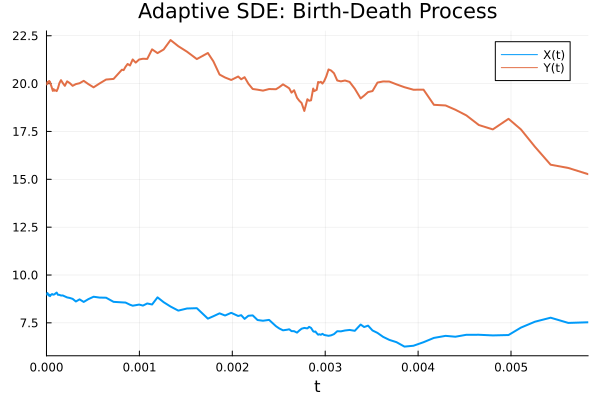

In [14]:
plot(ssol,lw=2,title="Adaptive SDE: Birth-Death Process")